# A Machine Learning Case Study : The Boston Housing Dataset

The algorithm used depends on whether the machine learning system is trained under human supervision. 

Machine Learning systems can be classified according to the amount and type of supervision they get during training. 
There are four major categories: 
- Supervised learning 
- Unsupervised learning
- Semi-supervised learning
- Reinforcement learning

In the following session, we will go through a **real-life example** with **basic principles** of a **popular algorithm**.

In supervised learning, the training data you feed the algorithm includes the desired solutions, called labels.
In maths language, there is a corresponding y (solution) to every data point (x), and supervised learning is to learn how to best represent y in terms of x.

In data science language, we usally call **y our target variable, and x our feature**.

There are 2 sub-categories of supervised learning:
- Classification
- Regression



The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: Nitric oxide concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centers
- **RAD**: Index of accessibility to radial highways
- **TAX**: Full-value property tax rate per 10,000 dollars
- **PTRATIO**: Pupil-teacher ratio by town
- **B**: $1000(Bk — 0.63)²$, where Bk is the proportion of people of African American descent by town
- **LSTAT**: Percentage of lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000s

## [Q1] Let's say we want to use some of these features to predict MEDV.

Can you identify which type of machine learning problem we would be solving?

* Supervised/Unsupervised?
* Classification/Regression?
* Univariate/Multivariate?

Can you think of some examples for the other types of problems, using this dataset?

- Predictive
- Supervised
- Regression
- Multivariate

## Load the librairies you need

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load the data

In [2]:
df = pd.read_csv("BostonHousing.csv", sep = ",")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Exploratory analysis

### [Q2] Describe the dataset with one command line

In [4]:
df.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### [Q3] Plot the histogram of the target variable "medv"

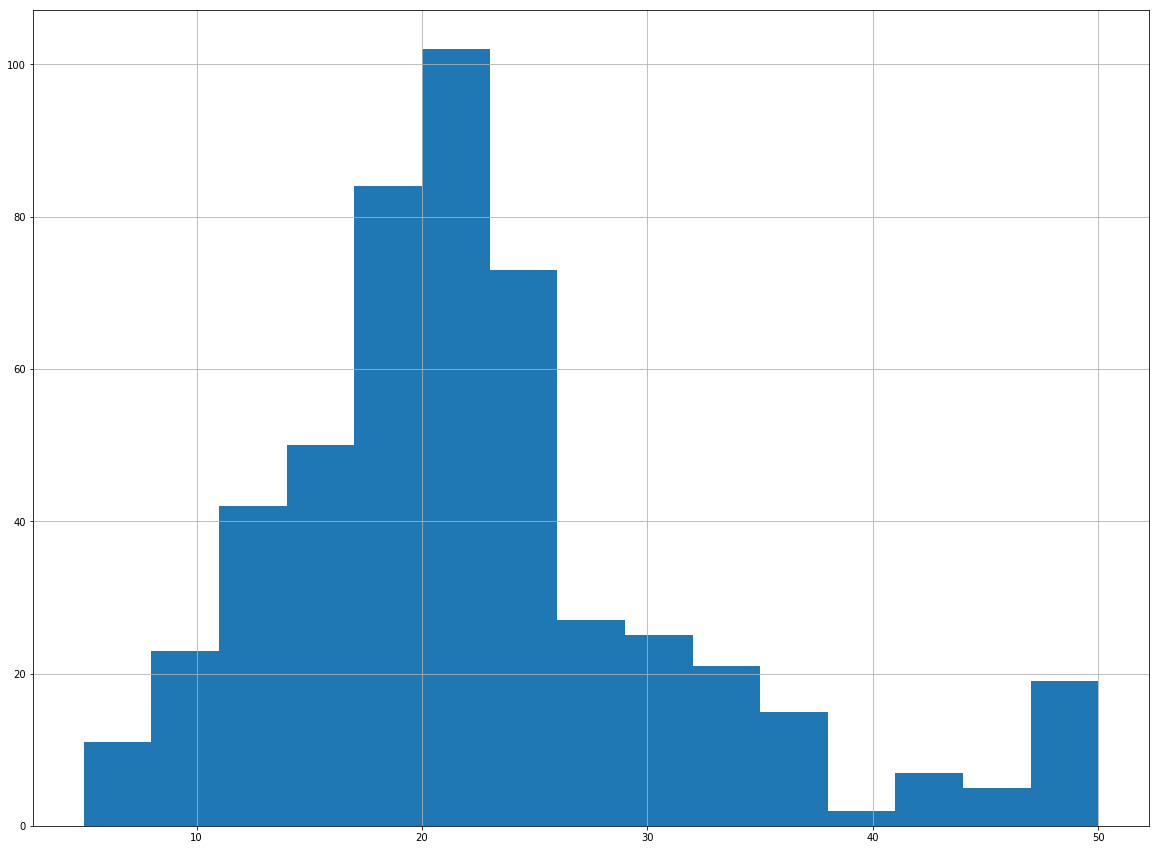

In [5]:
df['medv'].hist(bins=15, figsize=(20,15))

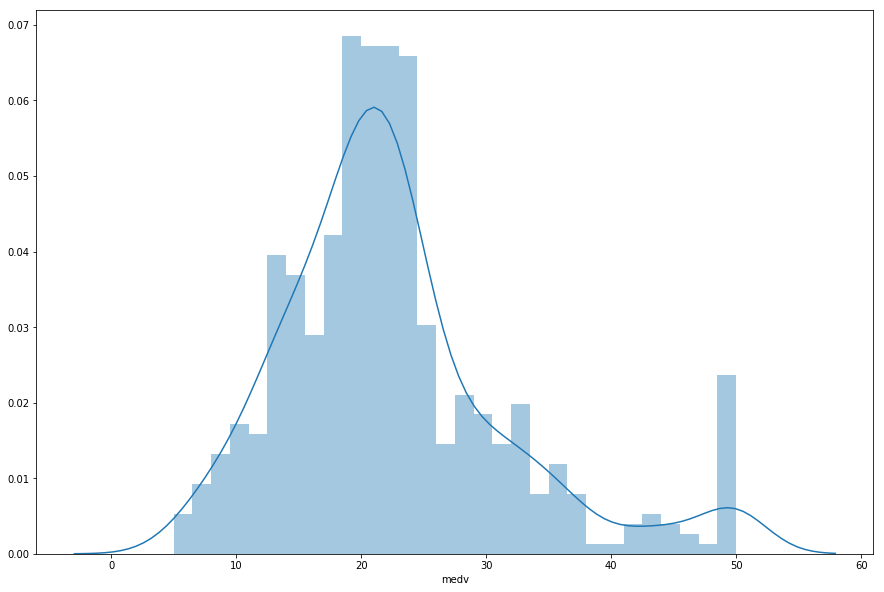

In [6]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.distplot(df['medv'], bins = 30)

### [Q4] Plot the correlation matrix between all the variables

 Remember that a correlation matrix can be computed only on quantitative variables (e.g. numbers, not categories).

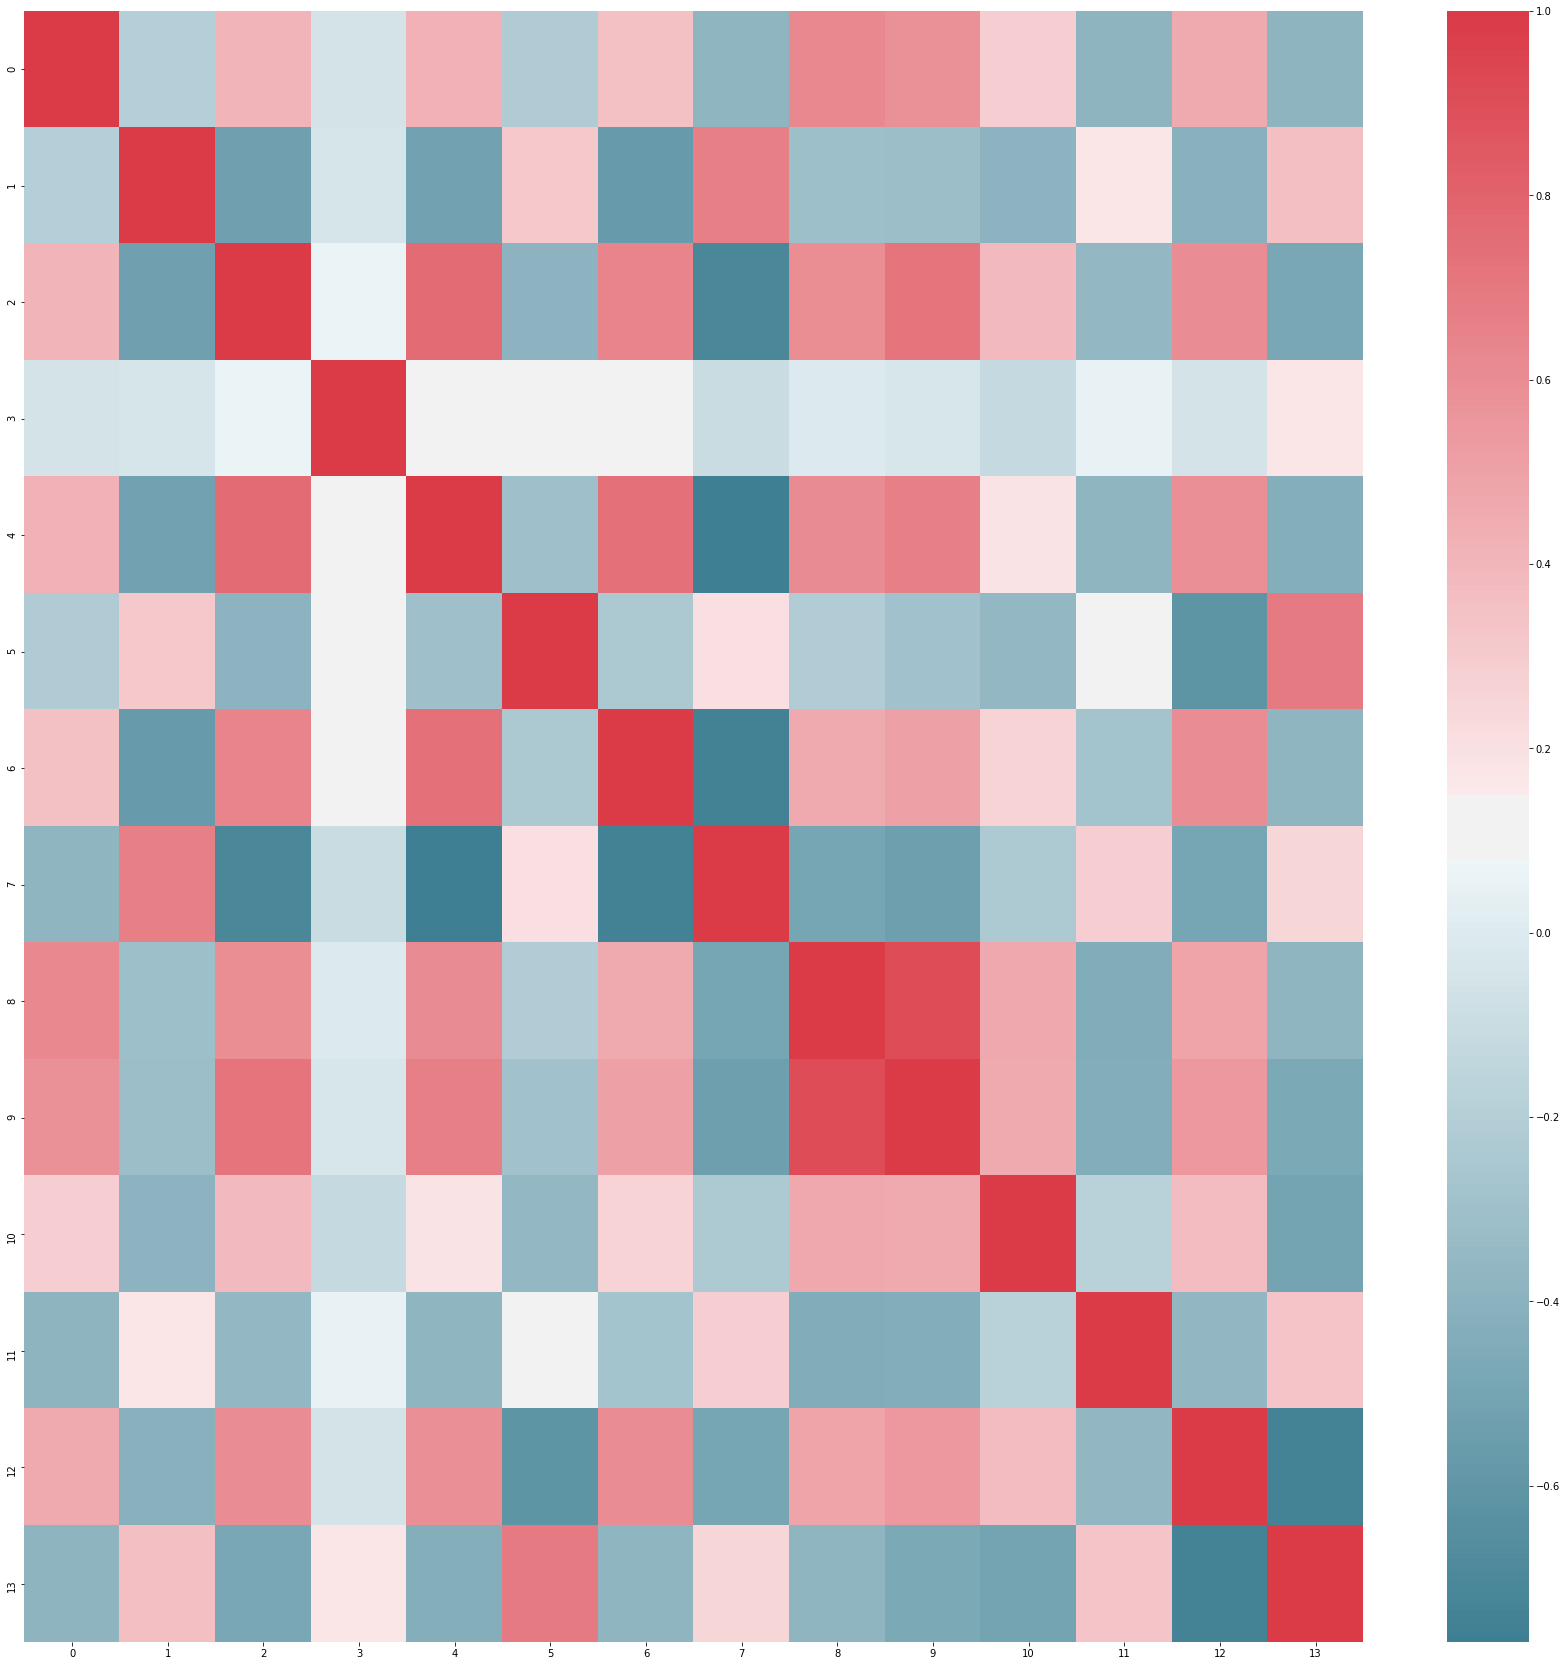

In [7]:
corr = df.corr().values
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap = cmap)

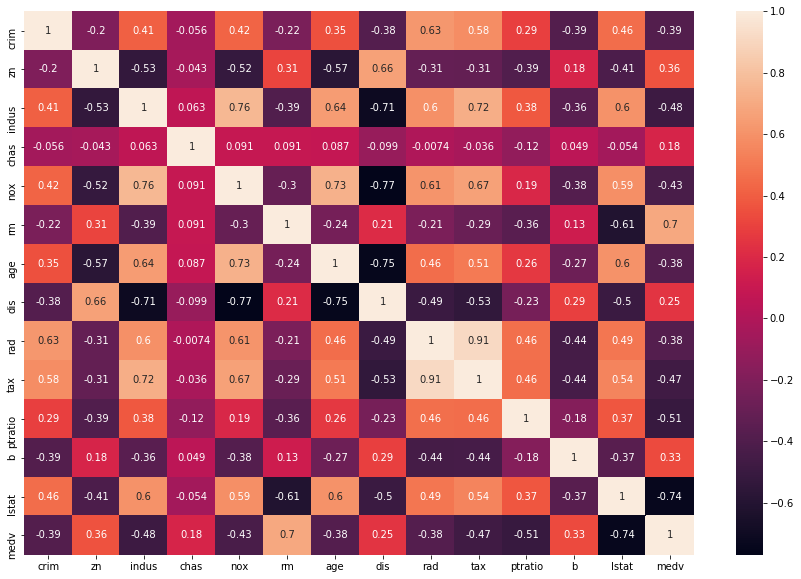

In [8]:
plt.figure(figsize = (15,10))
correlation_matrix = df.corr()
sns.heatmap(data = correlation_matrix, annot = True)

Let's visualize the relationship between our target variable MEDV and the variables to which it is the most correlated.

### [Q5] Use a scatter plot to visualize the relationship between MEDV and LSTAT and MEDV and RM

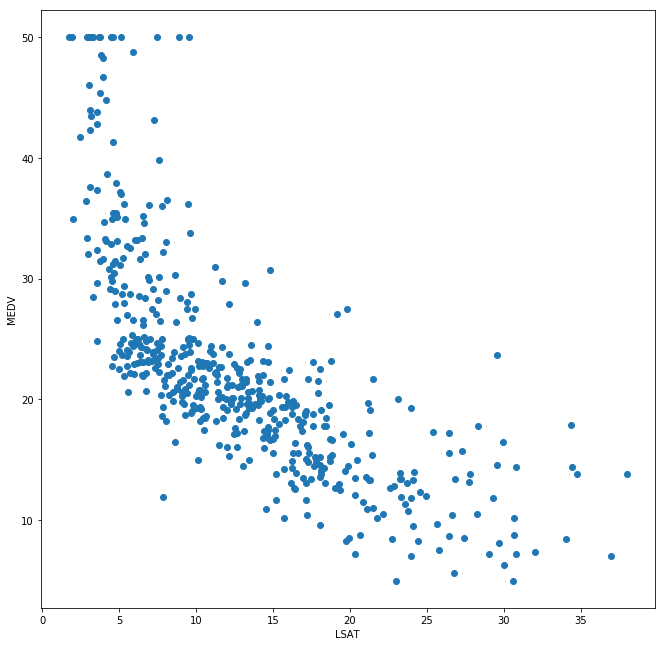

In [9]:
plt.figure(figsize = (11,11))
plt.scatter(df['lstat'], df['medv'], marker='o')
plt.xlabel("LSAT")
plt.ylabel("MEDV")
plt.show()

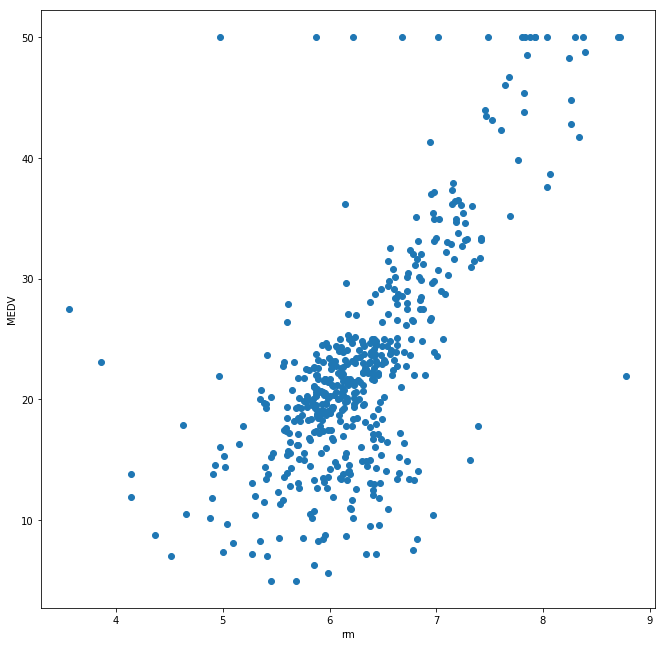

In [10]:
plt.figure(figsize = (11,11))
plt.scatter(df['rm'], df['medv'], marker='o')
plt.xlabel("rm")
plt.ylabel("MEDV")
plt.show()

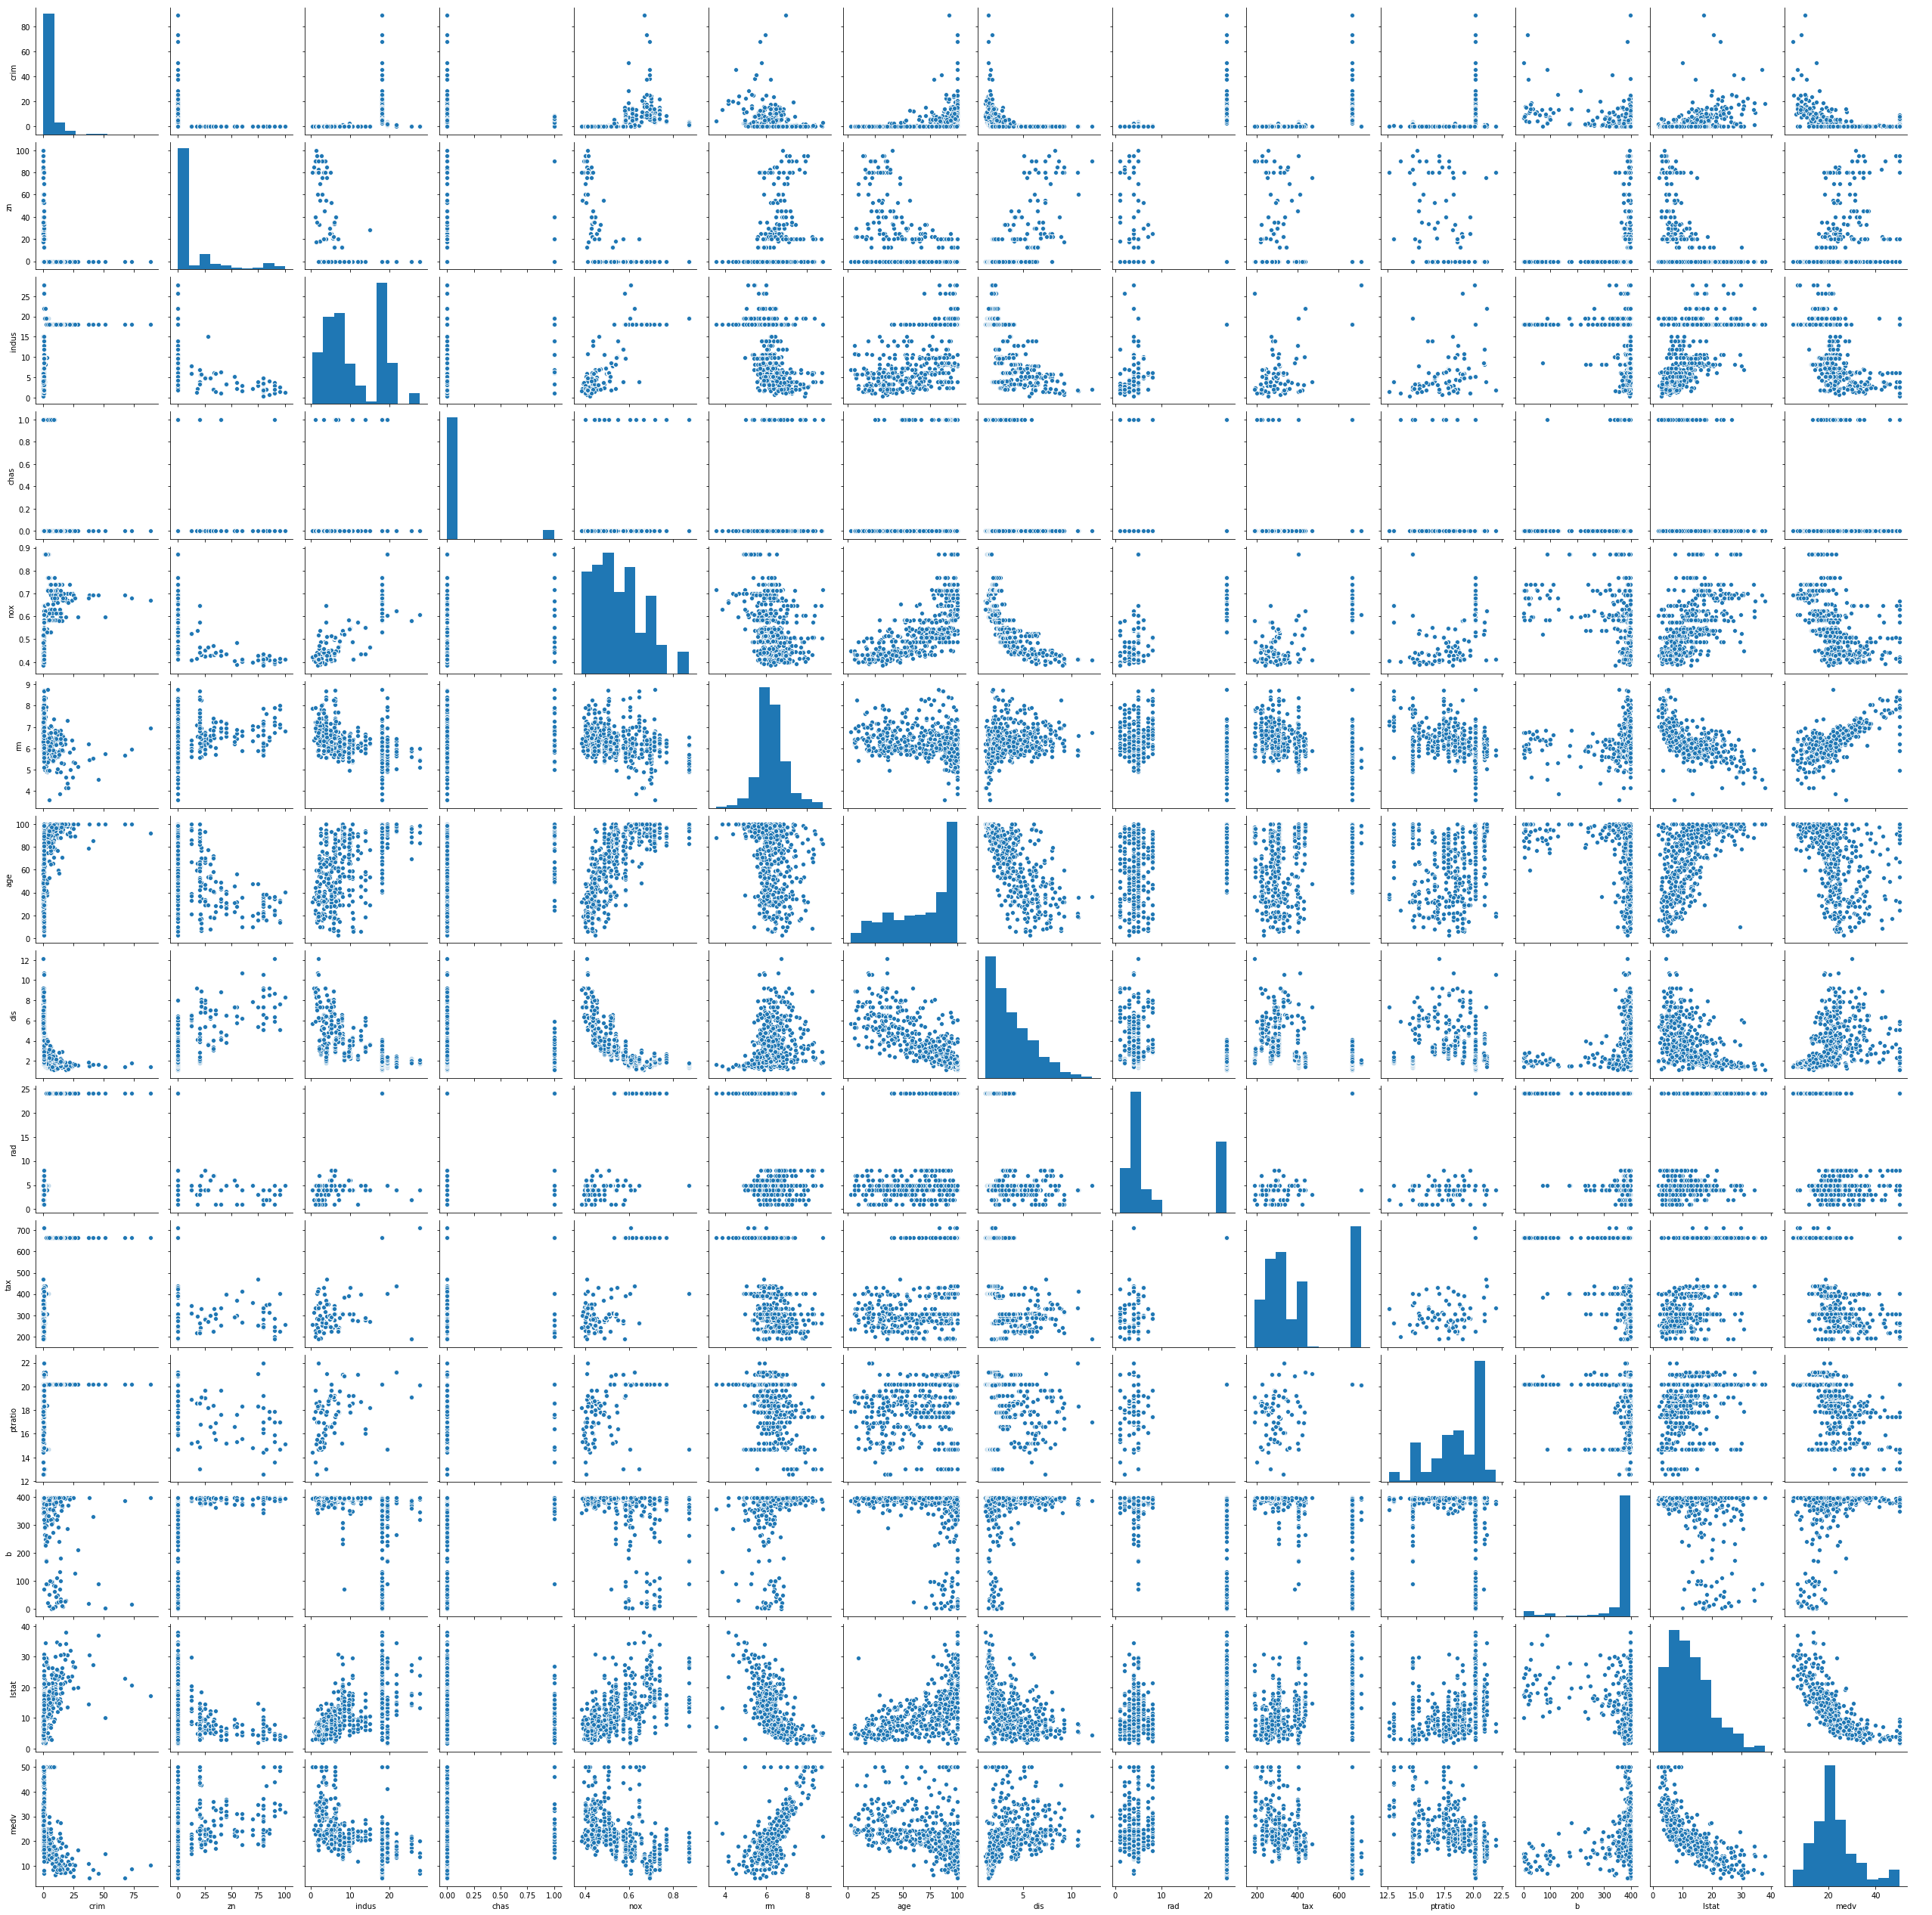

In [11]:
sns.pairplot(df)

![What now](images/what_now.gif)

## Data Splits


Let's build a predictive model based on these two features.

Before starting to build a regression model, we need to keep some testing data that will be unknown to the model. This will enable us to evaluate the performance of the model on new data. Here we train the model on 80% of the data and test it on the remaining 20%.

**Question: what problems could you foresee if we train on 100% of the data?**

In [12]:
from sklearn.model_selection import train_test_split
X = df[['lstat', 'rm']]
y = df['medv']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


## Modelling

### Training the model

**Scikit-learn** is a well-known Python package implementing Machine Learning algorithms. Let's now use scikit-learn to train our simple linear regression model.
A linear regression model calculates an equation that minimizes the distance between the observed value and the predicted value.

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Testing the model

We now need to test our model on the remaining 20% of data. The metrics used to evaluate the performance of the model depend on the type of model you trained and the business problem. These metrics enable you to measure on your test data - which is unseen data for your model - the error of your model compared to the reality.
The most common metrics used to evaluate a regression model are :

- The **Mean Absolute Error (MAE)** measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. The lower the MAE, the better your model is. 

$$\large{MAE = \frac{1}{n}\sum\nolimits_{i=1}^{n}{|y_i - \widehat{y}_i|}}$$

- The **Root Mean Square error** (RMSE) also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation. The lower the RMSE, the better your model is. 

$$\large{RMSE = \sqrt{\frac{1}{n}\sum\nolimits_{i=1}^{n}{(y_i - \widehat{y_i})^{2}}}}$$

- The **R-squared (R2)** is the percentage of the response variable variation that is explained by a linear model. It is always between 0 and 100%, and our aim is to maximise this measure - the closer to 100% is the R-squred, the more observed variation can the model explain.

$$\large{R^2 = \frac{Explained\ variation}{Total\ variation}}$$


Let's look at these metrics on the test dataset.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# model evaluation for testing set
y_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('MAE score is {}'.format(mae))


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953
MAE score is 3.7913102133431047


You can also visualize the coefficients of your regression.

In [17]:
model.coef_

array([-0.71722954,  4.58938833])

In [18]:
model.intercept_

2.7362403426066138

Our final model estimated on the training data can be described as below:

$$MEDV = - 0.72(LSTAT) + 4.59(RM) + 2.73 $$

## Interpretation

Reminder: MEDV is *Median value of owner-occupied homes in $1000s*.

* How should we interpret the coefficient of -0.72 in front of **LSTAT**, or *Percentage of lower status of the population?*
* How should we interpret the coefficient of 4.59 in front of **RM**, or *Average number of rooms per dwelling*?
* How should we interpret the **intercept** of +2.73? What does this represent?
* Suppose we have a neighbourhood with 10% lower-status population, where the houses have, on average, 4.5 rooms. What should we expect the median value of an owner-occupied home in this neighbourhood to be?
* Does this number make sense? When was this dataset published? What was the average price of a house back then?

In [19]:
-0.72*10 + 4.59*4.5 +2.73

16.185000000000002

![easy](images/easy.gif)

# A classification problem : the Adult Income dataset

Another common use case in Supervised Learning is classification. Let's try one example now with the **Adult Income** dataset. This dataset was extracted from the 1994 Census database and is described by the following variables:

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **income**: `>50K`, `<=50K`

Prediction task is to determine whether a person makes over 50K a year.

## Load the data 

In [20]:
df = pd.read_csv("adult.csv", sep = ",")

In [21]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Exploratory analysis

As always, you must keep in mind that before training a model, you need to get the big picture of the dataset and obtain first insights on your data.

In [22]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [23]:
df['income'].value_counts()/len(df['income'])

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [24]:
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
continuous_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

### Continuous features

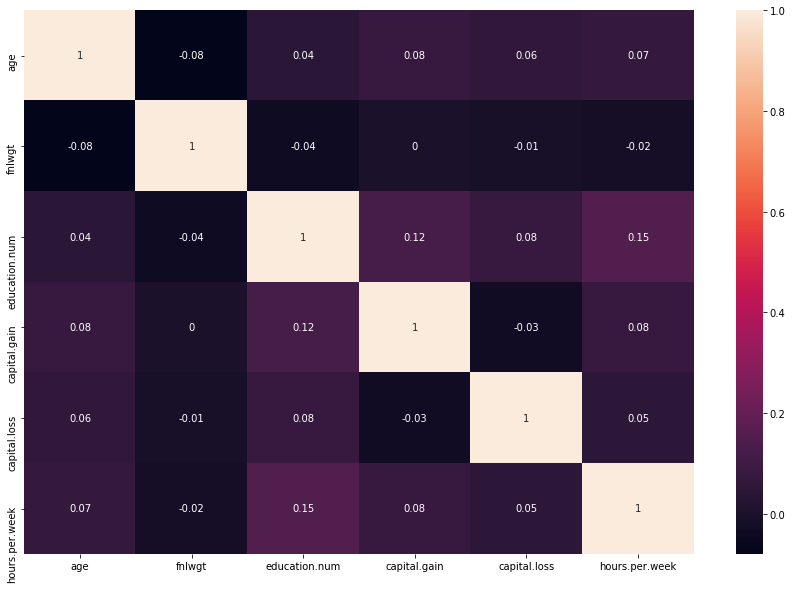

In [25]:
plt.figure(figsize = (15, 10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

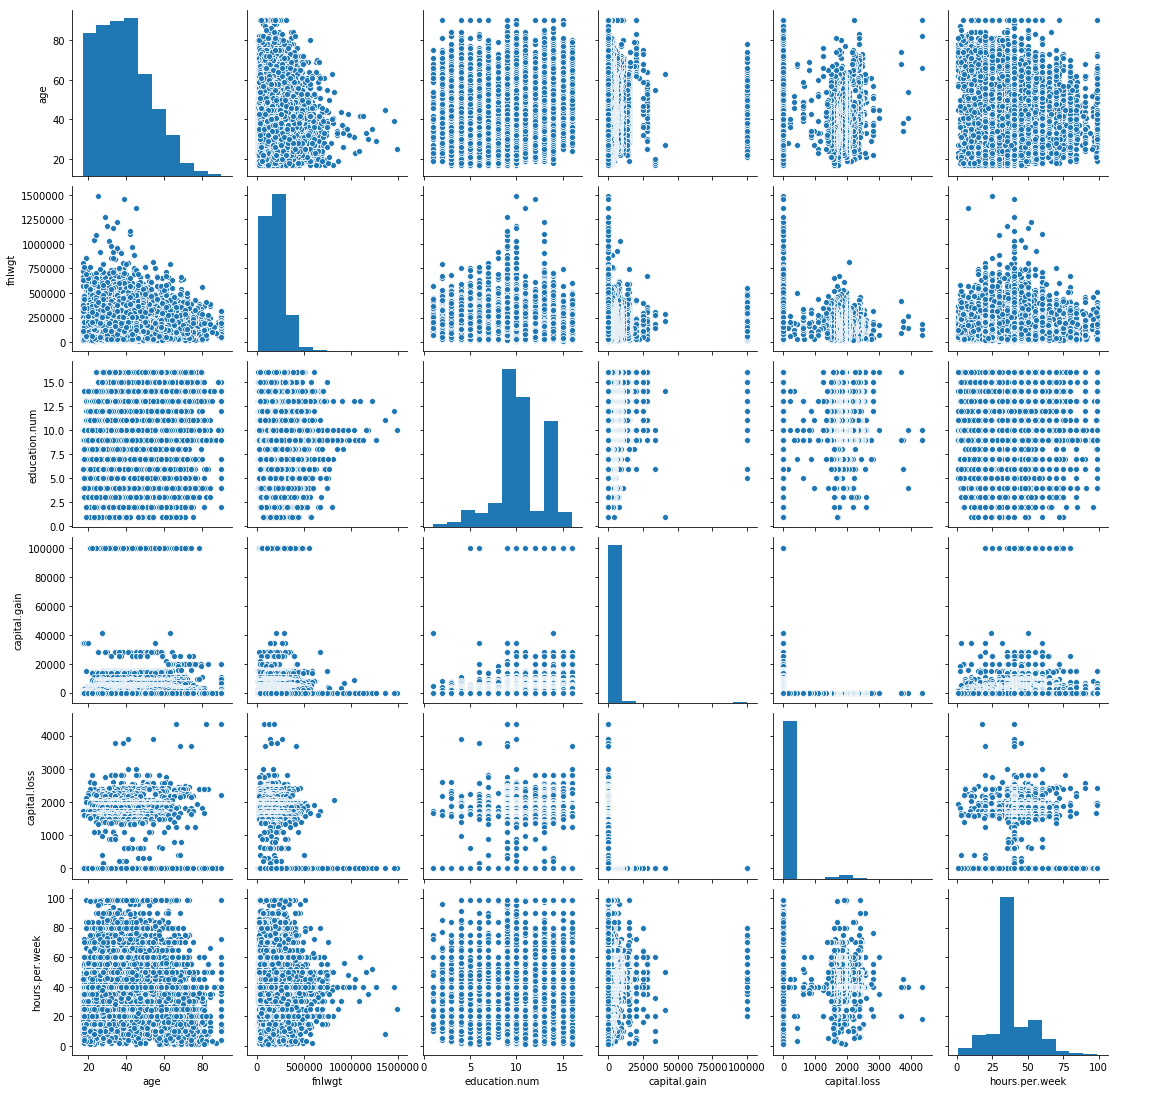

In [26]:
sns.pairplot(df)

### Categorical features

A good means to obtain insights about a categorical feature is to visualize its distribution thanks to a **violin plot**. 

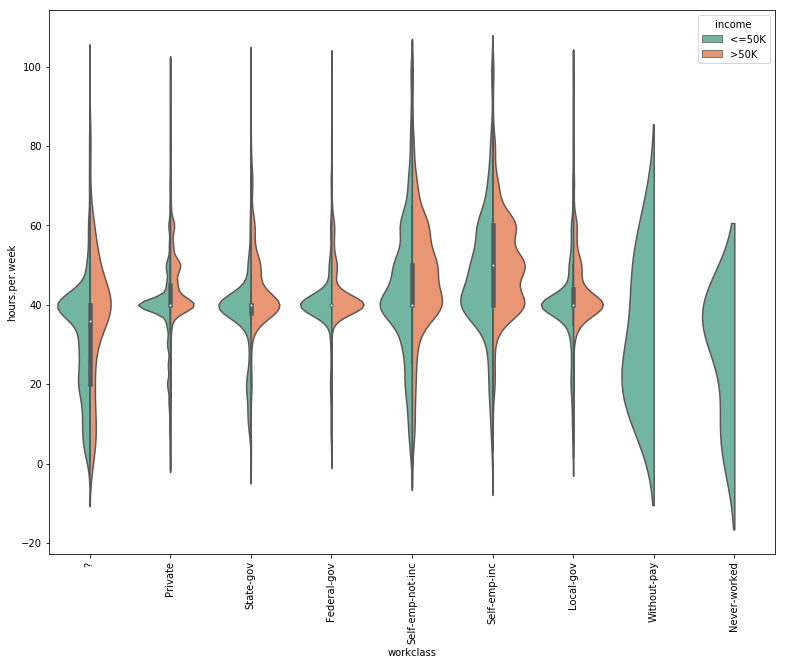

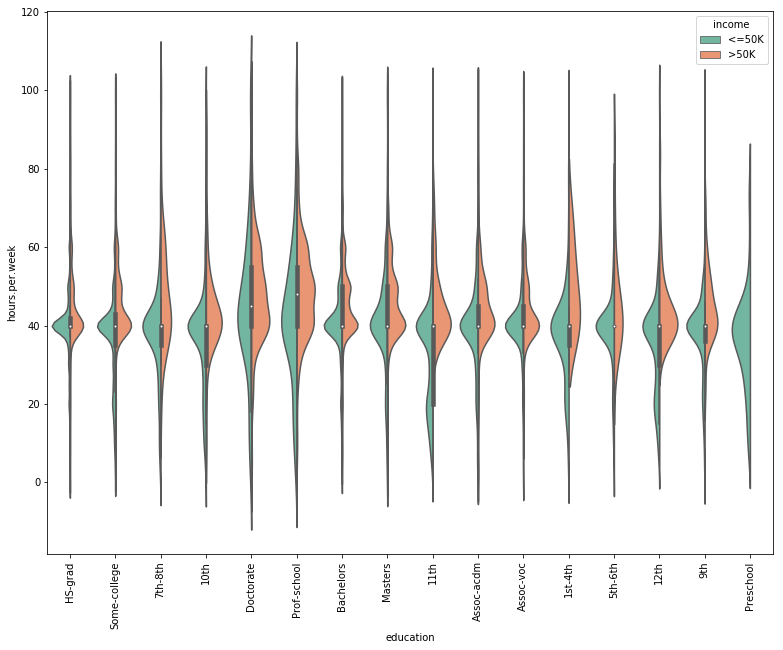

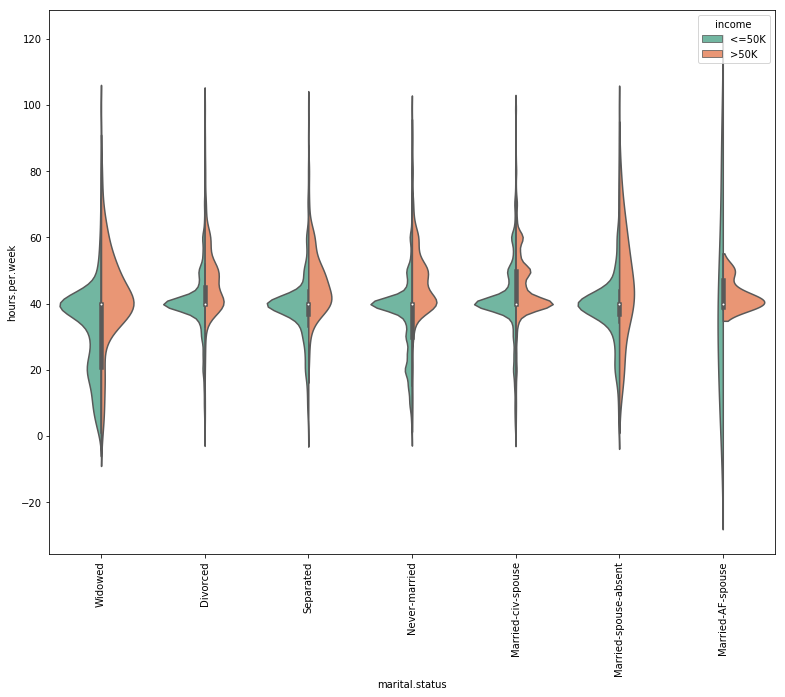

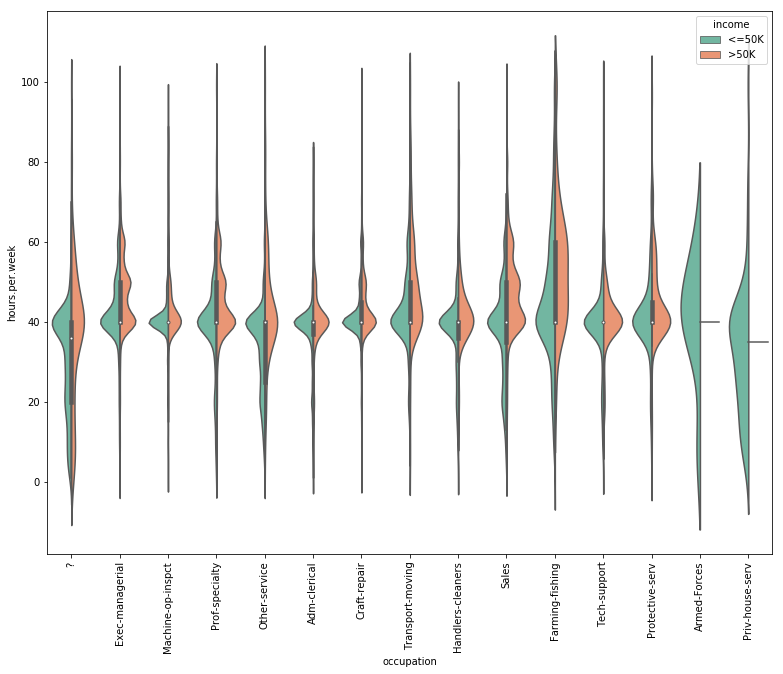

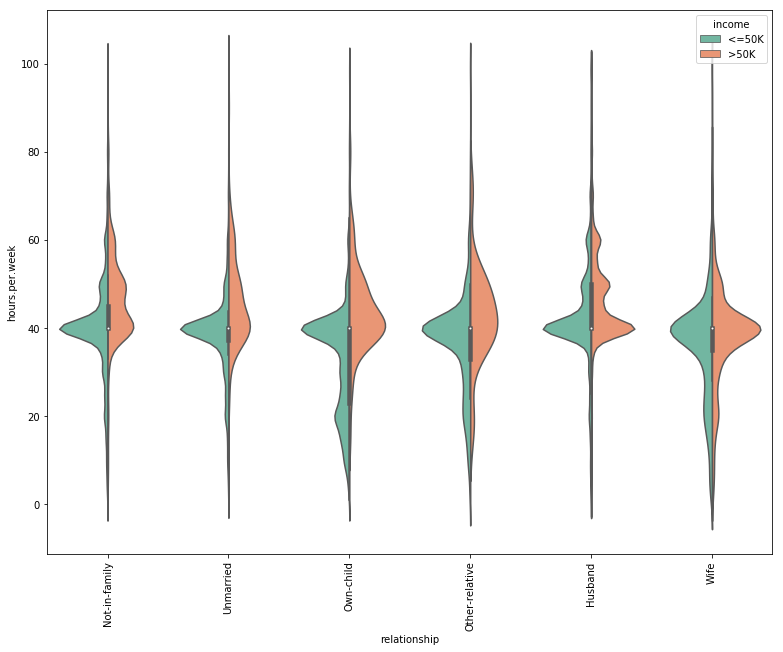

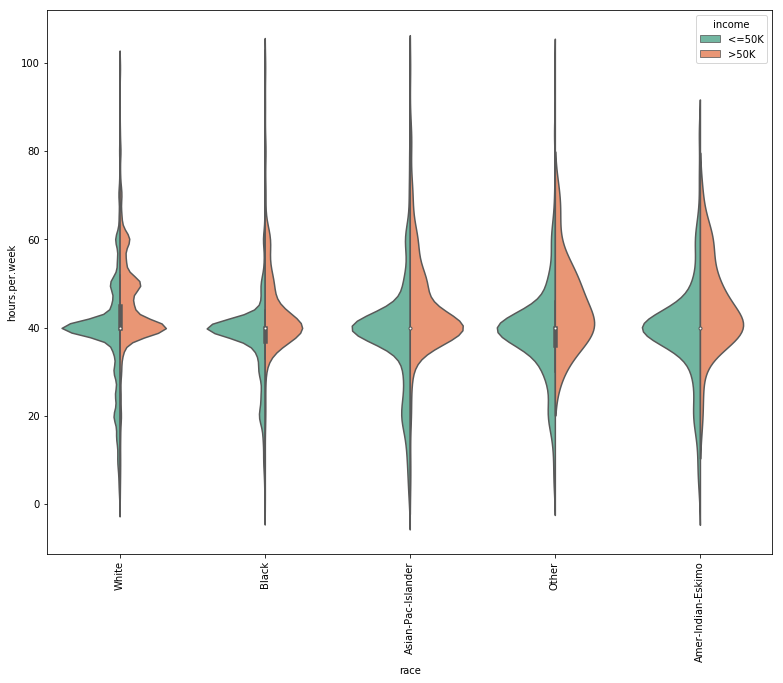

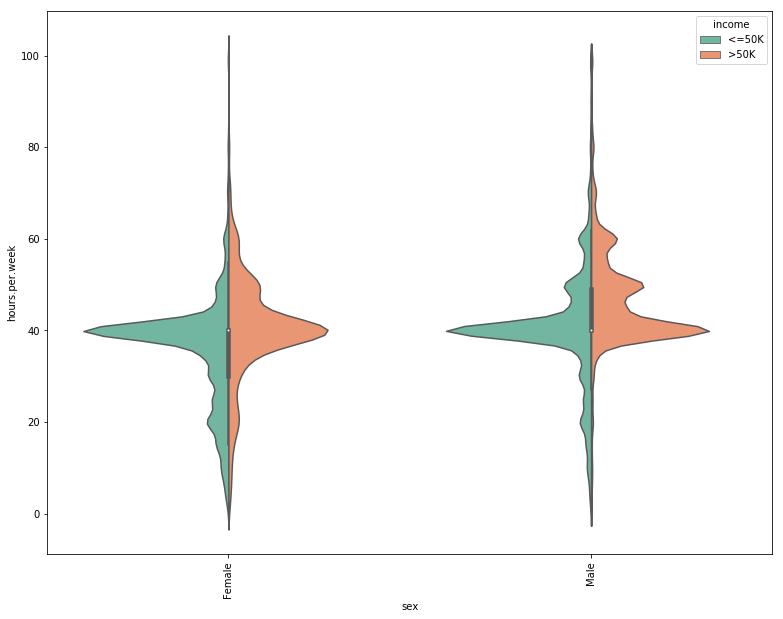

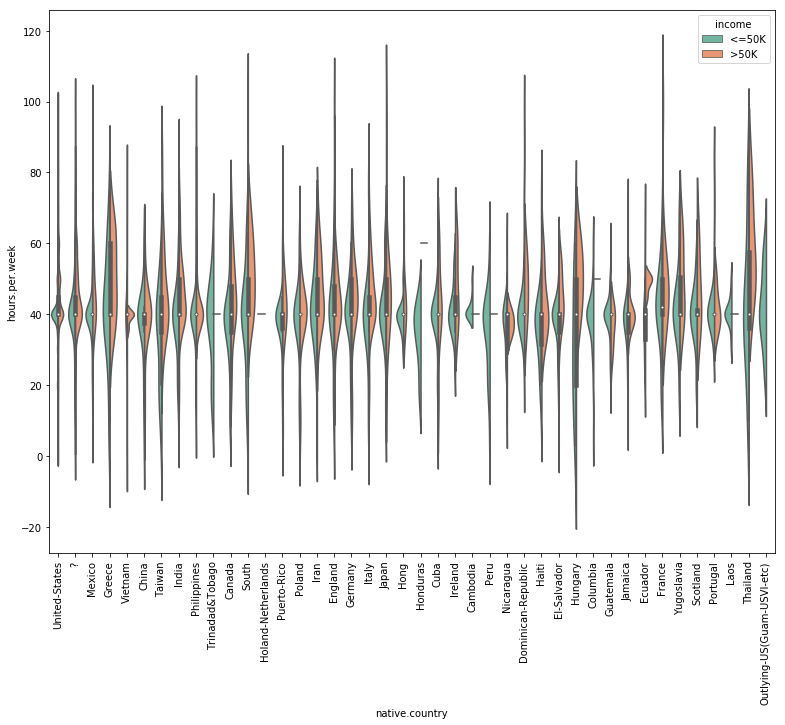

In [27]:
for feature in categorical_features:
    plt.figure(figsize = (13,10))
    ax = sns.violinplot(x=feature, y="hours.per.week", hue="income",
                        data=df, palette="Set2", split=True)
    plt.xticks(rotation=90)

There are many different ways of extracting information from data and turning it into insights. Check out **seaborn**'s documentation for more ideas about data visualization : https://seaborn.pydata.org/index.html

## Modelling

### Data preparation

Our target variable is a categorical feature with two categories. This is called a **binary classification** problem. Before fitting a model to the data, you need to convert it to a number.

In [28]:
df.loc[df['income'] == '<=50K', 'income'] = 0
df.loc[df['income'] == '>50K', 'income'] = 1

In [29]:
df['income'] = df['income'].astype(int)


Keep also in mind that for almost all classification models, you need to **one-hot encode** the categorical variables. As a reminder, here is what does one-hot encoding :
> One-hot encoding converts each categorical value into a new column and assigns a 1 or 0 (True/False) value to each row.
> * **Advantage**: "neutral" representation of the data (does not assign an order)
> * **Disadvantage**: can **significantly increase** the number of columns in the dataset

In [30]:
df = pd.get_dummies(df, columns = categorical_features)

You also always need to keep a sample of your data on which you won't train your model to be able to test the performance of your model on unknown data.

In [31]:
X = df.drop('income', axis = 1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


### Training the logistic regression <a name="Logistic_regression"></a>

Logistic regression is a generalized linear model which helps to model a **binary variable**,
via an exponential function as a 'link function', taking continuous variables tied in a regression model, 
as illustrated in the following equations, with y the output variable and $x_0, x_1, ..., x_n$ the explanatory varibles.

$y =  \exp(x_{0} + \alpha_{1} * x_{1}\ + ... + \alpha_{n} * x_{n})$

In [32]:
X_train.shape

(26048, 108)

In [33]:
from sklearn.linear_model import LogisticRegression

# Let's compute the logistic regression
# Initiate your logistic model
logit = LogisticRegression(penalty='l2', tol=0.0001, C=1.0)
# Fit your logistic regression model to your train model
logit.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

The output of a logistic regression with the function **predict_proba** is a probability for each class 0 or 1. You can also use directly the function **predict** that returns the predicted class associated with the probability with a default threshold of 0.5.

In [34]:
# Predict labels on your Test set of independent variables
pred_logit = logit.predict(X_test)
# Predict probabilities on your Test set of independent variables
proba_logit = logit.predict_proba(X_test)

In [35]:
pred_logit

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
proba_logit

array([[0.74566299, 0.25433701],
       [0.88385965, 0.11614035],
       [0.79754952, 0.20245048],
       ...,
       [0.79088548, 0.20911452],
       [0.80325264, 0.19674736],
       [0.80939957, 0.19060043]])

### Feature importance

Thanks to the coefficients of the logistic regression, you can visualize the importance of each feature in your model with a barplot. This is a good means to add some value to your analysis and interpret your model.

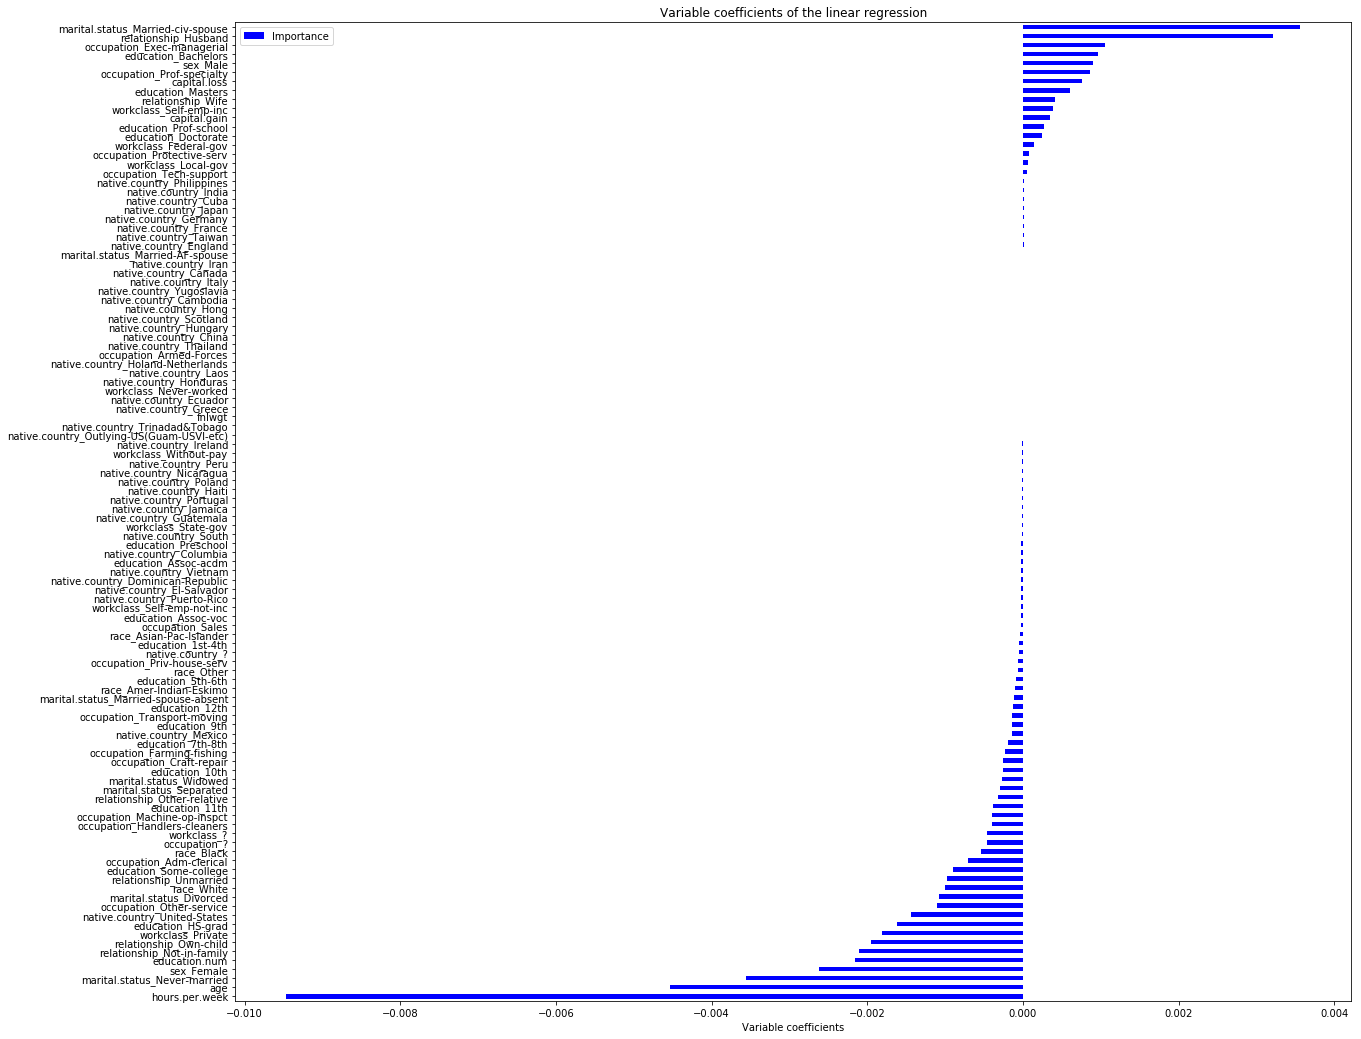

In [37]:
# Plot feature importance
coefs = pd.DataFrame(logit.coef_.reshape((108, 1)), 
                         index = X_train.columns.tolist(), columns = ['Importance'])
coefs = coefs.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the linear regression')
plt.show()

### Testing the logistic regression

A good way to evaluate your classification model is to compute the **confusion matrix**. A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

![Confusion matrix](images/confusionMatrix.jpg)


In [38]:
#confusion matrix
print("Confusion Matrix")
table = pd.crosstab(y_test, pred_logit)
print(table)
print("")

print("Confusion Matrix in percentges")
table = pd.crosstab(y_test, pred_logit) / len(y_test)
print(table)

Confusion Matrix
col_0      0    1
income           
0       4798  155
1       1129  431

Confusion Matrix in percentges
col_0          0         1
income                    
0       0.736680  0.023799
1       0.173346  0.066175


Just like for a regression problem, a classification can be assessed with specific metrics. The main one is the **ROC curve** and the **AUC - Area Under the Curve**. The closest to 1 is your AUC, the better is your classification model. You will have a specific session on this topic, but in the meantime, you can find more details about what a ROC curve is [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) and on [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

AUC : 0.6224939430648091


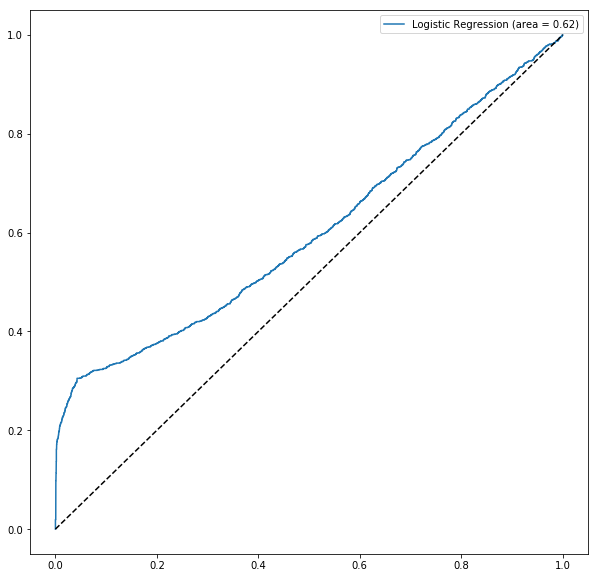

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
#roc curve
auc = roc_auc_score(y_test, pred_logit)
print("AUC : " + str(auc))
fpr, tpr, thresholds = roc_curve(y_test, proba_logit[:,1], pos_label=1)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='best')
plt.show()